<h3> Cleaning and Viewing the Data </h3>
    
This module will include:
<ul><li> Data Cleaning </li>
    <li> Visuals </li>
    <li> Application of Domain Knowldge </li>
    <li> Subsetting the Data for Alternate Views </li>
    <li> Preprocessing - Tokenization of Text Data </li>
    
This kaggle dataset is composed of two cvs files with slightly differnent dimetions.  Let's merge and see what the have in common.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

<h4> Import Libraries to be Used <\h4>

In [3]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
df2 = pd.read_csv('winemag-data_first150k.csv')
df2.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [5]:
df3 = pd.concat([df, df2], axis=1)

In [6]:
print(df.shape, "\n", df.describe())

(129971, 14) 
           Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000


In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
# We're intersted mainly in the 'points' and the 'description' columns.

df[df.duplicated('description',keep=False)].sort_values('description').head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew


In [9]:
df3 = df.drop_duplicates('description')
df3.isna().sum()

country                     59
description                  0
designation              34532
points                       0
price                     8388
province                    59
region_1                 19558
region_2                 73195
taster_name              24912
taster_twitter_handle    29441
title                        0
variety                      1
winery                       0
dtype: int64

In [10]:
print(df3.shape, df.shape)

(119955, 13) (129971, 13)


In [11]:
# the shape of df3 and df are the same after cleaning duplicate descriptions.

In [12]:
data = df
data.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [13]:
# region 2 seems mostly invalid
# taster name while a large nan could be very valueable information for prose/style of description
# price should be average filled
# twitter handle will have a large coorelation with taster_name and should be dropped

In [14]:
data_cleaned = data.drop(['taster_twitter_handle', 'region_2'], axis=1)
data_cleaned.isna().sum()

country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


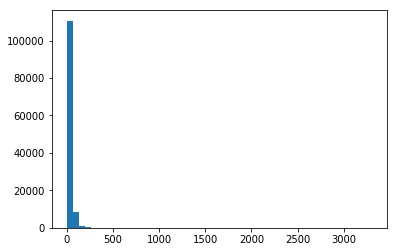

In [15]:
data_cleaned['taster_name'].fillna("other taster", inplace=True)
plt.hist(data_cleaned.price, bins=50)
plt.show();

In [16]:
data_cleaned.price.max()

3300.0

In [17]:
print(data_cleaned.price.mode(), '\n', data_cleaned.price.median(), '\n', data_cleaned.price.mean())

0    20.0
dtype: float64 
 25.0 
 35.363389129985535


In [18]:
data_cleaned['price'].fillna(25., inplace=True)

In [19]:
data_cleaned.isna().sum()

country           63
description        0
designation    37465
points             0
price              0
province          63
region_1       21247
taster_name        0
title              0
variety            1
winery             0
dtype: int64

In [20]:
# I'd like to keep region around.  Lets fill a token for 'unknown'

In [21]:
data_cleaned['region_1'].fillna('unknown', inplace=True)
data_cleaned['designation'].fillna('unknown', inplace=True)
data_cleaned.dropna(axis=0, inplace=True)
data_cleaned.isna().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

In [22]:
data_cleaned.shape

(129907, 11)

<h4> Domain Knowledge Transformations </h4>

While perhaps not essential for our neural network.  It might help our logreg (or whatever supervised method we choose to use) to apply some knowledge of the industry.  We have a stunning number of values for 'variety' while some of this data are just translations of the same wine.  We can infer origin from other features so why not make our math a little easier and apply some transaltions to counterpart varieties?



In [23]:
import unicodedata

In [24]:
# Replace German names with English names for wines
data_cleaned['variety'] = data_cleaned['variety'].replace(['weissburgunder'], 'chardonnay')
data_cleaned['variety'] = data_cleaned['variety'].replace(['spatburgunder'], 'pinot noir')
data_cleaned['variety'] = data_cleaned['variety'].replace(['grauburgunder'], 'pinot gris')

# Replace the Spanish garnacha with the french grenache
data_cleaned['variety'] = data_cleaned['variety'].replace(['garnacha'], 'grenache')

# Replace the Italian pinot nero with the french pinot noir
data_cleaned['variety'] = data_cleaned['variety'].replace(['pinot nero'], 'pinot noir')

# Replace the Portugues alvarinho with the spanish albarino
data_cleaned['variety'] = data_cleaned['variety'].replace(['alvarinho'], 'albarino')


# Also, get rid of the umlauts and tildas to make variety names consistent.
def removeaccents(inputstr):
    nfkd_form = unicodedata.normalize('NFKD', inputstr)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

data_cleaned['variety'] = data_cleaned['variety'].apply(removeaccents)
data_cleaned['description'] = data_cleaned['description'].apply(removeaccents)

In [25]:
# I could see the use of looking for Nans in string object features.  no description could be a good sign that it was rushed to the press and not a priority for that issue
# or, that the wine was too pitiful to even review!

print(len(data_cleaned.variety.unique()), "total entries")
variety_test = data_cleaned.variety.unique()
strings = 0
for i in variety_test:
    if type(i) == str:
        strings += 1
    else:
        pass
print(f"{strings} are strings")

saved = None
for i in variety_test:
    if type(i) != str:
        saved = i
    else:
        pass
print(f"one is a: {saved} \nif 'None' all are strings" )

701 total entries
701 are strings
one is a: None 
if 'None' all are strings


In [26]:
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

Since points will be our target it would be good to condense the ammount of outcomes.  We points ranging from 80-100 but don't really need all of them.  we could go bivarant and do either 'good' vs 'not-as-good' or maybe a 1-5 scale.  Some visualizations will help us see where best to draw these distinctions.

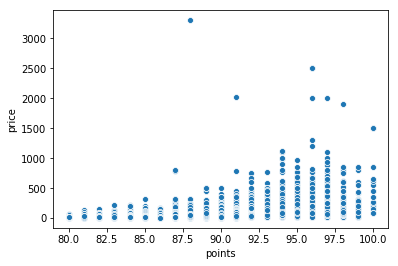

In [27]:
sns.scatterplot(data_cleaned.points, data_cleaned.price)

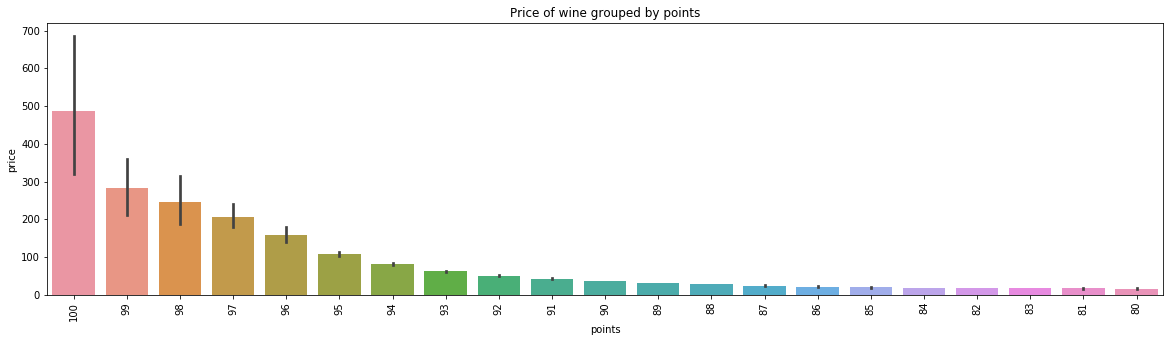

<Figure size 432x288 with 0 Axes>

In [28]:
# append value counts for each bin

box_data = pd.DataFrame({col:vals['price'] for col,vals in data_cleaned.groupby('points')})
meds2 = box_data.median()
meds2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='points',y='price', data=data, order=meds2.index, ax = ax)
plt.xticks(rotation = 90)
plt.title('Price of wine grouped by points')
plt.show()
plt.savefig('price by points')

In [29]:
pts = data_cleaned.points
pts.value_counts(sort=False)

80       397
81       692
82      1835
83      3024
84      6478
85      9529
86     12595
87     16927
88     17197
89     12208
90     15403
91     11353
92      9606
93      6489
94      3758
95      1535
96       523
97       229
98        77
99        33
100       19
Name: points, dtype: int64

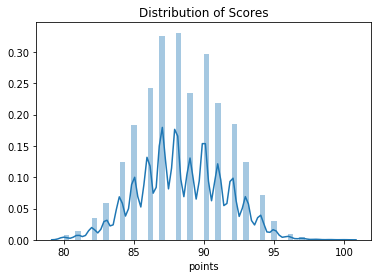

In [30]:
#  label the median, mean

distribution = sns.distplot(data_cleaned.points).set_title("Distribution of Scores")
distplot = distribution.get_figure()
distplot.savefig("output.png")

In [31]:
data_cleaned.points.std()

3.0400775447466986

___


~~~

In [32]:
data_cleaned.description[10]

'Soft, supple plum envelopes an oaky structure in this Cabernet, supported by 15% Merlot. Coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.'

In [33]:
high_end = data_cleaned[data_cleaned.points > 97]
high_end = high_end.reset_index()
print(high_end.description[15], "\n", len(high_end.description[15]))

Red berry, cedar and light spice aromas lead the way on this dazzling red. The vibrant palate is loaded with finesse, delivering bright red currant, red raspberry, white pepper and chopped herb alongside bright acidity and firm, polished tannins. Impeccably balanced, it's loaded with elegance, energy and intensity but it's still young, so give it time to fully develop. Drink 2020–2038. 
 388


In [34]:
low_end = data_cleaned[data_cleaned.points < 82]
low_end = low_end.reset_index()
low_end.description[10]

"Earthy and very tight after aging 20 months in barrel and another two years in bottle prior to release, this wine's fruit is slipping away, leaving behind only a pruney sourness."

In [35]:
middle_part = data_cleaned[data_cleaned.points == 89]
middle_part = middle_part.reset_index()
middle_part.description[4]

'This wine strikes a superb balance between herbaceous, green notes and ripe black fruit, all graced with a kiss of sweet vanilla. Rich blackberry and cassis flavors flood the palate, but then transition to sweet smoke and oak flavors on the finish.'

___

~~~

In [36]:
pts.sum()

11489891

In [37]:
# data_cleaned.points = pts

In [38]:
print("~ Median:", data_cleaned.points.median(),
    "\n~ Mode:", data_cleaned.points.mode(),
    "\n~ Mean:", data_cleaned.points.mean())

~ Median: 88.0 
~ Mode: 0    88
dtype: int64 
~ Mean: 88.44705058233967


In [39]:
# reestablish points across a 2 std spread with the median at 89
# or
# reestablish points across two outcomes; "excellent", "less-excellent"

# 

<h4> Sorting the points into bivariate outcomes </h4>

In [40]:
points2 = data_cleaned.points

In [41]:
data_cleaned.points.sum()

11489891

In [42]:
high_nums = []
for i in range(90,101):
    high_nums.append(i)
low_nums = []
for i in range(80,90):
    if i != 1:
        low_nums.append(i)


In [43]:
points2 = points2.replace(high_nums, 1, inplace = False)
points2 = points2.replace(low_nums, 0, inplace = False)
points2.unique()

array([0, 1], dtype=int64)

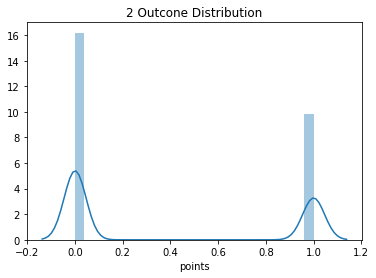

In [44]:
two_dist = sns.distplot(points2).set_title("2 Outcone Distribution")
two_dist = two_dist.get_figure()
two_dist.savefig('Two_outcome.png')

<h4> Sorting the points into 5 ordinal outcomes </h4>

In [45]:
points5 = data_cleaned.points
points5.describe()

count    129907.000000
mean         88.447051
std           3.040078
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [46]:
points5 = points5.replace([100, 99, 98, 97, 96, 95, 94], 2, inplace = False)
points5 = points5.replace([93, 92, 91], 1,inplace = False)
points5 = points5.replace([90, 89, 88], 0)
points5 = points5.replace([87, 86, 85], -1)
points5 = points5.replace([84, 83, 82, 81, 80], -2)
points5.unique()

array([-1,  0,  1, -2,  2], dtype=int64)

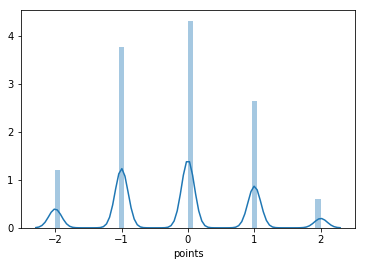

In [47]:
sns.distplot(points5)

In [48]:
data_cleaned['two_outcomes'] = points2
data_cleaned['five_outcomes'] = points5

data_cleaned.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,two_outcomes,five_outcomes
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,-1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0,-1
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,-1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0,-1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,-1


In [49]:
data_final = data_cleaned
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129907 entries, 0 to 129970
Data columns (total 13 columns):
country          129907 non-null object
description      129907 non-null object
designation      129907 non-null object
points           129907 non-null int64
price            129907 non-null float64
province         129907 non-null object
region_1         129907 non-null object
taster_name      129907 non-null object
title            129907 non-null object
variety          129907 non-null object
winery           129907 non-null object
two_outcomes     129907 non-null int64
five_outcomes    129907 non-null int64
dtypes: float64(1), int64(3), object(9)
memory usage: 18.9+ MB


<h4> Preprocessing the Text and other transformations </h4>

<ul><li> Segment text into words </li>
    <li> Embedding (using data or a pretrained network) </li>
    </ul>
pretrained lexicon <a href= "https://nlp.stanford.edu/projects/glove/"> Here </a>

In [52]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import sklearn.preprocessing as preprocessing

C:\Users\Mark\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning:

h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems

Using TensorFlow backend.


In [53]:
y = data_final[['two_outcomes','five_outcomes']]
X = data_final.drop(['two_outcomes', 'five_outcomes'], axis=1)
price = X.price
X_ = X.drop(['price'], axis=1)

In [54]:
X_ = X_.drop(['description', 'title'], axis=1)

In [55]:
# dummy variables might make for a better model but would require more computing power.  Label encoding is a more might weight alternative.

lb = preprocessing.LabelEncoder()
X_enc = lb.fit_transform(X_.country)

print(X_enc.shape, X_.shape)
print(X_enc[:5])
X_.country.head()

(129907,) (129907, 8)
[22 31 40 40 40]


0       Italy
1    Portugal
2          US
3          US
4          US
Name: country, dtype: object

In [56]:
features = X_.columns
encoded_features = {}
count = 0
for i in range(0,len(features)):

    lb = preprocessing.LabelEncoder()
    feat_enc = lb.fit_transform(X_[features[i]])
    key_value = features[i], feat_enc
    encoded_features.update([key_value])

In [57]:
encoded_features.keys()

dict_keys(['country', 'designation', 'points', 'province', 'region_1', 'taster_name', 'variety', 'winery'])

In [58]:
minmax = preprocessing.MinMaxScaler()
price_minmax = minmax.fit_transform(np.array(price).reshape(-1, 1))
 
print(price_minmax.shape, type(price_minmax))

(129907, 1) <class 'numpy.ndarray'>


In [59]:
labeled_features = pd.DataFrame.from_dict(encoded_features)
labeled_features.columns
price_minmax = pd.DataFrame(price_minmax.reshape(-1), columns=['price'])

In [60]:
df_X = pd.concat([labeled_features, price_minmax], axis=1)
df_X.head()

,country,designation,points,province,region_1,taster_name,variety,winery,price
0,22,36781,7,331,424,9,685,11602,0.006371
1,31,2322,7,108,1229,15,448,12949,0.003337
2,40,37888,7,268,1217,14,434,13011,0.003034
3,40,27954,7,218,549,0,477,14380,0.002731
4,40,36441,7,268,1217,14,438,14610,0.018507


In [61]:
# encode, lower case, extract all possible tokens? make a dict with each word and the times it is used???
# load glove and such

<h3> Tokenize the Text </h3>

In [83]:
data_final.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,two_outcomes,five_outcomes
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,-1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0,-1
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0,-1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0,-1
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,-1


In [72]:
test = data_final.description[0].lower()
type(test)

str

In [78]:
text = pd.DataFrame(data = data_final['description'].str.lower(), columns = ['description'])
text['taster'] = data_final['taster_name']
text['points'] = data_final['points']
%store text

Stored 'text' (DataFrame)


In [84]:
text.head(1)

,description,taster,points
0,"aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,87


In [72]:
for key, value in Taster_dfs.items():
    value.description = value.description.str.lower()

In [73]:
Taster_dfs['Schachner'].description[:1]

5    blackberry and raspberry aromas show a typical...
Name: description, dtype: object

In [74]:
# Adapted from Deep learning Francois Chollet Chapter 6
maxlen = 40
def keras_enc(samples, maxlen=maxlen):
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(samples)

    sample_sequences = tokenizer.texts_to_sequences(samples)
    #9999 unique
    # one_hot_description = tokenizer.texts_to_matrix(data_final.description, mode='binary')

    word_index = tokenizer.word_index
    print(f'found {len(word_index)} unique tokens')

    samples_transformed = sequence.pad_sequences(sample_sequences, maxlen=maxlen)
    total_vocabulary = set(word for desc in samples_transformed for word in desc)
    print("There are {} unique tokens in our dataset.".format(len(total_vocabulary)))
    
    return samples_transformed, total_vocabulary, word_index

In [72]:
text_X, total_vocabulary, word_index = keras_enc(text)

found 37269 unique tokens
There are 9997 unique tokens in our dataset.


dict = {'key1':'geeks', 'key2':'for'}  
print("Current Dict is: ", dict)  
  
#### adding dict1 (key3, key4 and key5) to dict  
dict1 = {'key3':'geeks', 'key4':'is', 'key5':'fabulous'}  
dict.update(dict1)  
  
#### by assigning  
dict.update(newkey1 ='portal')  
print(dict)  

In [73]:
for key, value in Taster_dfs.items():
    text_X, total_vocabulary, word_index = keras_enc(value.description)
    key['text_X'] = text_X
    key['total_vocab'] = total_vocabulary
    key['word_index'] = word_index

found 11525 unique tokens
There are 9004 unique tokens in our dataset.


TypeError: 'str' object does not support item assignment

In [79]:
# Taster_dfs['Voss'].description
# ~~~~~~~~

# keep the following for future processing of text data

# word_index #dictionary of words
# len(total_vocabulary) # number of unique words
# text_X[0] # the vector matrix for the previous tested 'text[0]'

In [78]:
text_X[0]

array([   0,    0,    6,    5,   16,    1,   27,    3,    4,   15,    5,
         85,   67,   55,   59,   51,   21,   37,  614,   83,    8,   50,
         26,   62,   18,    1, 1068,    8,   11,   43,  160,  336,  107,
          9,   45,  213,   57,  195,   13,  116])

In [80]:
text[0]

"aromas include tropical fruit, broom, brimstone and dried herb. the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [91]:
y = data_final['two_outcomes']
reviews = pd.concat([text, y], axis = 1)

In [92]:
reviews[:5]

,description,two_outcomes
0,"aromas include tropical fruit, broom, brimston...",0
1,"this is ripe and fruity, a wine that is smooth...",0
2,"tart and snappy, the flavors of lime flesh and...",0
3,"pineapple rind, lemon pith and orange blossom ...",0
4,"much like the regular bottling from 2012, this...",0


In [93]:
data_name = 'review_data'

if not os.path.exists(data_name):
    data = reviews

    data.to_csv(r"C:\Users\Mark\Documents\DataSci\Module 4\Supervised NN Project\_" + data_name + ".csv")
else:
    print("file with that name already exists")

In [96]:
test = pd.read_csv('_review_data.csv')

In [97]:
test.head(1)

,Unnamed: 0,description,two_outcomes
0,0,"aromas include tropical fruit, broom, brimston...",0
